# Всякая всячина


В данную тетрадку будут попадать всякие алгоритмы и методы, которые просто хочется пощупать вне темы


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Метод Парзеновского окна


In [ ]:
mu = [0, 1]
sigma = [0.7, 0.5]
N = 100
data = pd.DataFrame(
    np.random.normal(loc=mu, scale=sigma, size=(N, 2)), columns=["x1", "x2"]
)
data.head()

,x1,x2
0,-0.716174,1.650543
1,0.214925,1.411830
2,0.099125,1.259311
3,-0.876721,0.995684
4,-0.041472,1.190922


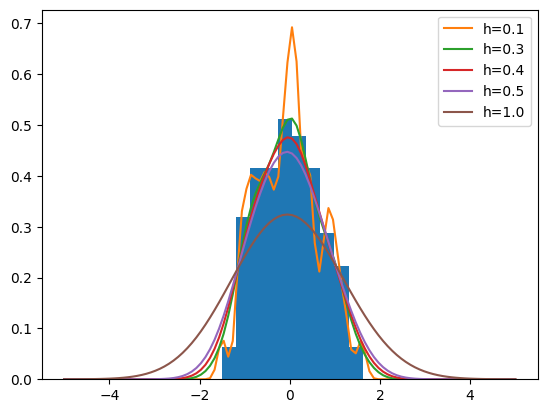

In [4]:
from typing import Callable


def gauss_kernel(x: np.ndarray | pd.Series) -> np.ndarray:
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)


kernels = {"gauss": gauss_kernel}


def parzen_window(
    x: pd.Series | np.ndarray,
    data: pd.Series | np.ndarray,
    h: float,
    kernel: str = "gauss",
):
    K: Callable[[np.array | pd.Series], np.array] = kernels.get(kernel)
    n = data.shape[0]
    d = 1
    if len(data.shape) > 1:
        d = data.shape[1]
    return K((x - data) / h).sum() / n / (h**d)


_, ax = plt.subplots()
ax.hist(data["x1"], density=True)

for h in [0.1, 0.3, 0.4, 0.5, 1.0]:
    x = np.linspace(-5, 5, 100)
    y = [parzen_window(i, data["x1"], h=h) for i in x]
    ax.plot(x, y, label=f"h={h}")

plt.legend()
plt.show()